In [14]:
import numpy as np
import pickle
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

from tools.load_data import load_data
from tools.data_processing import get_clustering, process_gravnet

#Data path and data containers
file_pattern = "/home/nstrobbe/mahon336/hgcalmlSingularity/hgcal_minimal_eval_example/output/singlePhoton24-04-01/nominal/*.pkl"
file_limit = 1000
files = glob.glob(file_pattern)[:file_limit]
data, score_noise_filter, pass_noise_filter, out_gravnet = [], [], [], []

#extract data, each length is {file_limit}
for file in tqdm(files):
    temp_load_data = load_data(file) #4 returns, all tensors
    data.append(temp_load_data[0])
    score_noise_filter.append(temp_load_data[1])
    pass_noise_filter.append(temp_load_data[2])
    out_gravnet.append(temp_load_data[3])

del temp_load_data, file, files, file_pattern


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:48<00:00, 20.82it/s]


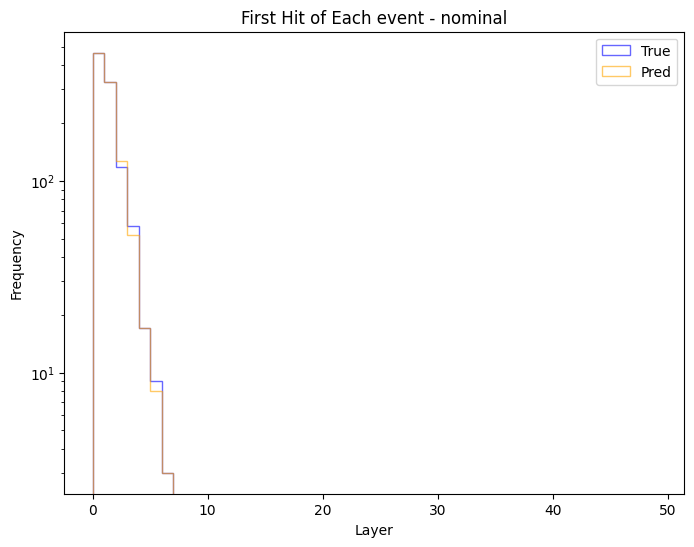

In [16]:
#Truth data processing
z_pos = np.array([ data[i].x[:,7] for i in range(file_limit) ], dtype=object)
unique_z = np.unique(np.round(np.concatenate(([np.unique(event) for event in z_pos]))))
true_cluster = np.array([ data[i].y for i in range(file_limit)], dtype=object)
final_pred_hits = np.array([ process_gravnet(score_noise_filter[i], pass_noise_filter[i], out_gravnet[i]) for i in range(file_limit)], dtype=object)

#PREDICTION PROCESSING
#Mask all hits for all events for noise, get the first hit in z_pos, find the corresponding layer
z_pred_clean = np.array([ z_pos[i][final_pred_hits[i] > 0] for i in range(file_limit)], dtype=object)
firstZ_pred = np.array([ np.round(sorted(z_pred_clean[i])[0]) for i in range(file_limit) ])
firstLayer_pred = [np.argwhere(firstZ_pred[i]==unique_z)[0][0] for i in range(file_limit)]

#TRUTH PROCESSING
#Mask all hits for all events for noise, get the first hit in z_pos, find the corresponding layer
z_true_clean = np.array([ z_pos[i][true_cluster[i] == True] for i in range(file_limit)], dtype=object)
firstZ_true = np.array([ np.round(sorted(z_true_clean[i])[0]) for i in range(file_limit) ])
firstLayer_true = [np.argwhere(firstZ_true[i]==unique_z)[0][0] for i in range(file_limit) ] 

# #plotting
fig, axs = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(8)
fig.set_figheight(6)
fig.tight_layout
axs.hist(firstLayer_true, range(50), histtype='step', alpha=0.6, color="blue", label='True')
axs.hist(firstLayer_pred, range(50), histtype='step', alpha=0.6, color="orange", label='Pred')

axs.set_ylabel("Frequency")
axs.set_yscale("log")
axs.set_xlabel("Layer")
axs.set_title("First Hit of Each event - nominal")
axs.legend()



plt.show()
